In [1]:
# Week 8: Model Evaluation and Tuning
# Theory: Study performance metrics for ML models, cross-validation, and hyperparameter tuning (GridSearchCV).
# Hands-On: Evaluate a model’s performance using accuracy,precision,recall and F1-score.Use GridSearchCV to tune hyperparameters.
# Client Project: Tune a model to improve its performance.

**Model Evaluation and Tuning**

**Model Evaluation**
- Model evaluation is the process of checking how well your machine learning model performs on unseen (test/validation) data. 
- It helps you know if the model generalizes well or just memorized the training data.

- Common Evaluation Metrics
- Classification

    - Accuracy – % of correct predictions.
    
    - Precision – Out of predicted positives, how many are actually positive.
    
    - Recall – Out of actual positives, how many were correctly predicted.
    
    - F1-score – Harmonic mean of precision & recall.
    
    - ROC-AUC – Area under the curve, shows model’s ability to separate classes.
**Model Tuning**
- Model tuning is the process of optimizing a model to improve performance by adjusting hyperparameters.
- Hyperparameter Tuning Methods

    - Grid Search – Try all possible combinations of parameters.
    
    - Random Search – Randomly selects combinations, faster than grid search.
    
    - Bayesian Optimization – Uses probability models to choose next best parameters.
    
    - Automated ML (AutoML) – Tools like AutoKeras, H2O, or Azure ML automate the process.

**1.Theory: Study performance metrics for ML models, cross-validation, and hyperparameter tuning (GridSearchCV).**

**Performance Metrics for ML Models**
- Performance metrics depend on the type of problem.

**1.Classification Metrics**
- When the target is categorical: spam/ham, disease/no disease, etc.
- Accuracy
    - Proportion of correct predictions.
- Precision (Positive Predictive Value)
    - Out oBalance between precision & recall, good for imbalanced datasets.f predicted positives, how many are correct.
    - Useful when false positives are costly
- Recall (Sensitivity / True Positive Rate)
    - Out of actual positives, how many were detected.
    - Useful when false negatives are costly
- F1-Score
    - Balance between precision & recall, good for imbalanced datasets.
- ROC-AUC (Receiver Operating Characteristic – Area Under Curve)
    - Measures ability to separate classes (1 = perfect, 0.5 = random).
- Confusion Matrix
    - A table showing TP, TN, FP, FN → helps visualize errors.

**2.Regression Metrics**
- When the target is continuous: house price, temperature, etc.

- Mean Absolute Error (MAE)
    - Average absolute difference between predictions & actual values.
- Mean Squared Error (MSE)
    - Penalizes large errors more than MAE.
- Root Mean Squared Error (RMSE)
    - Same unit as target variable, easier to interpret.
- R² Score (Coefficient of Determination)
    - Explains how much variance in target is captured by the model (closer to 1 = better).

**3. Clustering Metrics (unsupervised learning)**

- Silhouette Score → How well clusters are separated.

- Davies-Bouldin Index → Lower is better.

- Adjusted Rand Index (ARI) → Measures similarity with true labels (if available).

**What is Cross-Validation**

- Cross-validation is a resampling technique used to evaluate machine learning models on unseen data.
- Instead of relying on a single train-test split, CV provides a more reliable estimate of model performance.
- It helps detect overfitting and ensures the model generalizes well.

- Types of Cross-Validation
a)k-Fold Cross-Validation (most common)
    - Dataset is split into k equal parts (folds).
    - Model is trained on (k-1) folds and tested on the remaining fold.
    - Repeat k times, each fold being test set once.
    - Final performance = average of k runs.
    - Example: 5-fold CV → Train on 4 folds, test on 1 → repeat 5 times.

- b)Stratified k-Fold Cross-Validation

    - Similar to k-Fold but preserves class distribution in each fold. 
    - Important for imbalanced datasets (e.g., fraud detection, medical diagnosis).

- c)Leave-One-Out Cross-Validation (LOOCV)

    - Each sample is used once as test data, and the rest (n-1 samples) are training data.
    - Very accurate but computationally expensive (n folds).

- d)Leave-p-Out Cross-Validation

    - Similar to LOOCV but leaves p samples out for testing instead of 1.
    - Even more expensive computationally.

**Hyperparameter Tuning (GridSearchCV).**

- Parameters → Learned automatically during training (e.g., weights in linear regression, coefficients in logistic regression).

- Hyperparameters → Set before training and control the learning process.

- Examples of hyperparameters:
    
    - Decision Tree: max_depth, min_samples_split
    - Random Forest: n_estimators, max_features
    - SVM: C, kernel, gamma
    - Neural Networks: learning_rate, batch_size, epochs

**GridSearchCV**

- Grid Search → Tries all possible combinations of given hyperparameters.
- CV (Cross-Validation) → Each combination is evaluated using k-fold CV.
- Returns:
- Best hyperparameters (best_params_)
- Best score (best_score_)
- Best model (best_estimator_)

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Load dataset
X, y = load_iris(return_X_y=True)

# Define model
svm = SVC()

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV with 5-fold CV
grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit
grid.fit(X, y)
# Results
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
print("Best Model:", grid.best_estimator_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best Score: 0.9866666666666667
Best Model: SVC(C=0.1, kernel='poly')


**2. Hands-On: Evaluate a model’s performance using accuracy, precision, recall,
and F1-score. Use GridSearchCV to tune hyperparameters.**

In [6]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 2: Load dataset
X, y = load_iris(return_X_y=True)

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Define the model
log_reg = LogisticRegression(max_iter=500)

# Step 4: Define parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],         # Regularization strength
    'solver': ['liblinear', 'lbfgs'] # Optimization solvers
}

# Step 5: Apply GridSearchCV
grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Step 6: Evaluate on test data
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Step 7: Compute evaluation metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Test Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("Test F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.9666666666666668
Test Accuracy: 0.9666666666666667
Test Precision (macro): 0.9696969696969697
Test Recall (macro): 0.9666666666666667
Test F1-score (macro): 0.9665831244778612

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Client Project: Tune a model to improve its performance.**

In [9]:
# Step 1 — Imports all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from time import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import joblib

In [10]:
# Step 2 — Load data and quick EDA
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Features:", X.shape)
print("Classes distribution:\n", y.value_counts(normalize=True))
X.head()

Features: (569, 30)
Classes distribution:
 1    0.627417
0    0.372583
Name: proportion, dtype: float64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Step 3 — Create a robust evaluation function and baseline CV
def evaluate_cv(model, X, y, cv=5):
    scoring = ['accuracy','precision','recall','f1','roc_auc']
    start = time()
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False, n_jobs=-1)
    elapsed = time() - start
    summary = {k: np.mean(v) for k, v in scores.items() if k.startswith('test_')}
    summary['fit_time'] = np.mean(scores['fit_time'])
    summary['total_time_sec'] = round(elapsed, 2)
    return summary

# Baseline pipeline: scaler + logistic regression (simple, interpretable baseline)
baseline_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])

print("Baseline CV results (Stratified 5-fold):")
print(evaluate_cv(baseline_pipe, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)))

Baseline CV results (Stratified 5-fold):
{'test_accuracy': 0.9754230709517155, 'test_precision': 0.9706808688387636, 'test_recall': 0.9915884194053209, 'test_f1': 0.9807393515600202, 'test_roc_auc': 0.99537983716251, 'fit_time': 0.007142829895019531, 'total_time_sec': 2.24}


In [12]:
# Step 4 — Train/test split for later holdout evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
print("Train/test shapes:", X_train.shape, X_test.shape)

Train/test shapes: (455, 30) (114, 30)


Classification report (baseline on holdout):
              precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114

ROC AUC (holdout): 0.9957010582010581


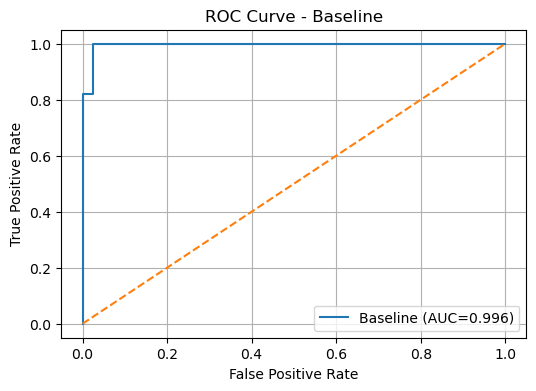

In [13]:
# Step 5 — Quick baseline fit and test evaluation
baseline_pipe.fit(X_train, y_train)
y_pred = baseline_pipe.predict(X_test)
y_proba = baseline_pipe.predict_proba(X_test)[:,1]

print("Classification report (baseline on holdout):")
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC (holdout):", roc_auc_score(y_test, y_proba))

# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Baseline (AUC={roc_auc_score(y_test, y_proba):.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Step 6 — Use RandomForest + RandomizedSearchCV to quickly explore hyperparameters
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),    # not required for RF but keeps pipeline consistent
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])
param_dist = {
    'clf__n_estimators': [50, 100, 200, 400],
    'clf__max_depth': [None, 5, 10, 20, 30],
    'clf__min_samples_split': [2, 4, 8, 12],
    'clf__min_samples_leaf': [1, 2, 4, 6],
    'clf__max_features': ['sqrt', 'log2', 0.2, 0.5, None]
}
rand_search = RandomizedSearchCV(
    rf_pipe,
    param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rand_search.fit(X_train, y_train)
print("Best params (RandomizedSearch):")
pprint(rand_search.best_params_)
print("Best CV AUC:", rand_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params (RandomizedSearch):
{'clf__max_depth': 5,
 'clf__max_features': 'sqrt',
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 12,
 'clf__n_estimators': 50}
Best CV AUC: 0.9905572755417957


RandomForest holdout report:
              precision    recall  f1-score   support

           0     0.9512    0.9286    0.9398        42
           1     0.9589    0.9722    0.9655        72

    accuracy                         0.9561       114
   macro avg     0.9551    0.9504    0.9526       114
weighted avg     0.9561    0.9561    0.9560       114

ROC AUC (RF holdout): 0.9947089947089947


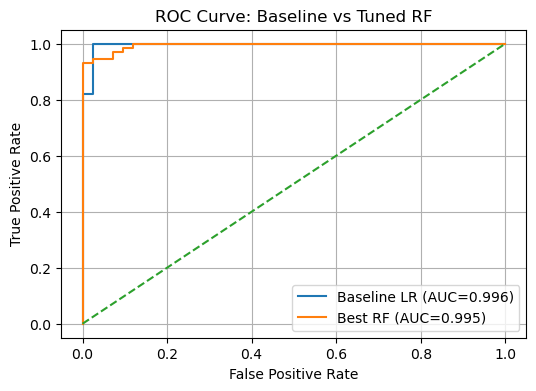

In [15]:
# Evaluate the best random-forest found on the holdout set
best_rf = rand_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:,1]

print("RandomForest holdout report:")
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC AUC (RF holdout):", roc_auc_score(y_test, y_proba_rf))

# Plot ROC of baseline vs RF
plt.figure(figsize=(6,4))
fpr_b, tpr_b, _ = roc_curve(y_test, baseline_pipe.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_b, tpr_b, label=f'Baseline LR (AUC={roc_auc_score(y_test, baseline_pipe.predict_proba(X_test)[:,1]):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Best RF (AUC={roc_auc_score(y_test, y_proba_rf):.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Baseline vs Tuned RF'); plt.legend(); plt.grid(True); plt.show()

In [16]:
# Step 7 — Grid search to finely tune Logistic Regression (smaller search space, deterministic)
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=42, max_iter=10000))
])
param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__class_weight': [None, 'balanced']
}
grid_lr = GridSearchCV(
    lr_pipe,
    param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)
grid_lr.fit(X_train, y_train)
print("Best LR params:", grid_lr.best_params_)
print("Best LR CV AUC:", grid_lr.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best LR params: {'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l2'}
Best LR CV AUC: 0.9959752321981423


In [17]:
# Evaluate tuned LR on holdout
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:,1]
print("Logistic Regression holdout report:")
print(classification_report(y_test, y_pred_lr, digits=4))
print("ROC AUC (LR holdout):", roc_auc_score(y_test, y_proba_lr))

Logistic Regression holdout report:
              precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114

ROC AUC (LR holdout): 0.9957010582010581


In [18]:
# Step 8 — Feature importance / selection: use the tuned RandomForest to get importances
rf_model = best_rf.named_steps['clf']
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 features by importance:")
print(importances.head(10))

# Example: automatic selection via SelectFromModel
selector = SelectFromModel(rf_model, threshold='median', prefit=True)
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features (median threshold):", selected_features)

Top 10 features by importance:
worst concave points    0.129972
worst radius            0.119609
worst area              0.101238
mean perimeter          0.096884
mean concave points     0.091875
mean concavity          0.076667
worst perimeter         0.060767
mean radius             0.052422
worst concavity         0.046194
area error              0.037343
dtype: float64
Selected features (median threshold): ['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']


In [19]:
# Re-train a model using only selected features and check if performance holds or improves
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

clf_sel = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))])
clf_sel.fit(X_train_sel, y_train)
y_proba_sel = clf_sel.predict_proba(X_test_sel)[:,1]
print("Selected-features RF AUC (holdout):", roc_auc_score(y_test, y_proba_sel))

C:\Users\prati\anaconda37\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\prati\anaconda37\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected-features RF AUC (holdout): 0.9912367724867726


In [20]:
# Step 9 — Small ensemble: VotingClassifier combining tuned LR and tuned RF
voting = VotingClassifier(estimators=[
    ('lr', best_lr.named_steps['clf']),
    ('rf', best_rf.named_steps['clf'])
], voting='soft', n_jobs=-1)

# Need to wrap voting in a pipeline if scaling required for LR
voting_pipe = Pipeline([('scaler', StandardScaler()), ('voting', voting)])
voting_pipe.fit(X_train, y_train)
y_proba_v = voting_pipe.predict_proba(X_test)[:,1]
print("Voting ensemble ROC AUC (holdout):", roc_auc_score(y_test, y_proba_v))

Voting ensemble ROC AUC (holdout): 0.996362433862434


In [21]:
# Step 10 — Save the best performing model (choose whichever has best holdout AUC)
results = {
    'baseline': roc_auc_score(y_test, baseline_pipe.predict_proba(X_test)[:,1]),
    'lr_tuned': roc_auc_score(y_test, y_proba_lr),
    'rf_tuned': roc_auc_score(y_test, y_proba_rf),
    'selected_rf': roc_auc_score(y_test, y_proba_sel),
    'voting': roc_auc_score(y_test, y_proba_v)
}
pprint(results)
best_key = max(results, key=results.get)
print("Best on holdout:", best_key, results[best_key])

# Map to estimator
est_map = {
    'baseline': baseline_pipe,
    'lr_tuned': best_lr,
    'rf_tuned': best_rf,
    'selected_rf': clf_sel,
    'voting': voting_pipe
}
best_model = est_map[best_key]

joblib.dump(best_model, f'best_model_{best_key}.joblib')
print(f"Saved best model to best_model_{best_key}.joblib")

{'baseline': 0.9957010582010581,
 'lr_tuned': 0.9957010582010581,
 'rf_tuned': 0.9947089947089947,
 'selected_rf': 0.9912367724867726,
 'voting': 0.996362433862434}
Best on holdout: voting 0.996362433862434
Saved best model to best_model_voting.joblib


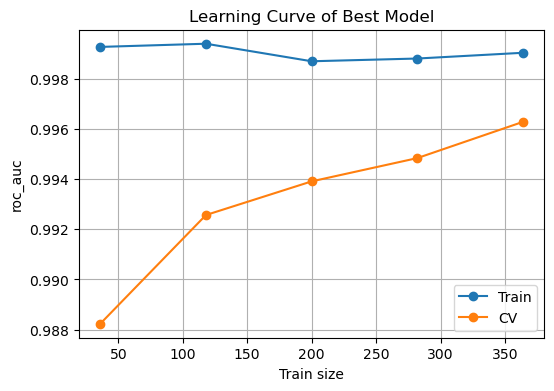

In [22]:
# Step 11 — Quick diagnostic: plot learning curve (train vs validation score)
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, scoring='roc_auc', title='Learning curve'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1,1.0,5), n_jobs=-1
    )
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    plt.figure(figsize=(6,4))
    plt.plot(train_sizes, train_mean, 'o-', label='Train')
    plt.plot(train_sizes, test_mean, 'o-', label='CV')
    plt.xlabel('Train size'); plt.ylabel(scoring)
    plt.title(title); plt.legend(); plt.grid(True); plt.show()
plot_learning_curve(best_model, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    scoring='roc_auc', title='Learning Curve of Best Model')

**Short explanation of each step**

- Baseline: gives a performance floor and a reproducible pipeline.
- Stratified CV: ensures class proportions are respected during validation.
- Pipelines: prevent data leakage (fit scaler on training folds only).
- RandomizedSearchCV: fast exploration of large hyperparameter spaces.
- GridSearchCV: fine-grained search for small parameter grids.
- Feature selection: reduces overfitting, speeds training, and can improve generalization.
- Ensembling: often gives small gains by combining complementary models.
- Learning curve: shows if you need more data or more regularization.